<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/S%26P_500_Stock__dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From Standard and poor's dataset using APPLE data to apply Time series

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/all_stocks_5yr.csv')

In [5]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [6]:
df.describe()

,open,high,low,close,volume
count,65342.000000,65342.000000,65342.000000,65341.000000,6.534100e+04
mean,93.260081,94.150787,92.339812,93.280038,4.494025e+06
std,94.898786,95.734445,93.955955,94.892024,1.084983e+07
min,1.620000,1.690000,1.610000,1.620000,7.802900e+04
25%,47.862500,48.300000,47.400000,47.870000,9.984490e+05
50%,69.070000,69.700000,68.560000,69.130000,1.918844e+06
75%,111.280000,112.313750,110.187500,111.340000,3.817714e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,2.683365e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65342 entries, 0 to 65341
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    65342 non-null  object 
 1   open    65342 non-null  float64
 2   high    65342 non-null  float64
 3   low     65342 non-null  float64
 4   close   65341 non-null  float64
 5   volume  65341 non-null  float64
 6   Name    65341 non-null  object 
dtypes: float64(5), object(2)
memory usage: 3.5+ MB


In [8]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     1
volume    1
Name      1
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.duplicated().sum()

0

<ipython-input-11-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

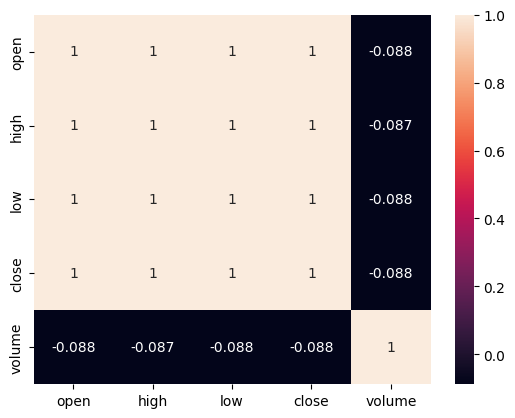

In [11]:
sns.heatmap(df.corr(), annot=True)

In [12]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65341 entries, 0 to 65340
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    65341 non-null  datetime64[ns]
 1   open    65341 non-null  float64       
 2   high    65341 non-null  float64       
 3   low     65341 non-null  float64       
 4   close   65341 non-null  float64       
 5   volume  65341 non-null  float64       
 6   Name    65341 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 4.0+ MB


In [15]:
df['Name'].value_counts()

AAL     1259
ANDV    1259
ALL     1259
ALXN    1259
AMAT    1259
AMD     1259
AME     1259
AMGN    1259
AMG     1259
AMP     1259
AMT     1259
AMZN    1259
ANSS    1259
ALK     1259
ANTM    1259
AON     1259
AOS     1259
APA     1259
APC     1259
APD     1259
APH     1259
AVGO    1259
ARE     1259
ARNC    1259
AAPL    1259
ALGN    1259
AVB     1259
ADS     1259
AAP     1259
ABBV    1259
ABC     1259
ABT     1259
ACN     1259
ADBE    1259
ADI     1259
ADM     1259
ADP     1259
ADSK    1259
AEE     1259
ALB     1259
AEP     1259
AES     1259
AET     1259
AFL     1259
AGN     1259
AIG     1259
AIV     1259
AIZ     1259
AJG     1259
AKAM    1259
ATVI    1259
ALLE    1063
APTV      44
AVY       25
Name: Name, dtype: int64

In [16]:
df.set_index('Name', inplace=True)
df.sample(2)

,date,open,high,low,close,volume
Name,,,,,,
ALXN,2015-05-08,164.09,167.655,161.750,163.02,3714140.0
AME,2016-08-26,49.85,50.270,49.515,49.66,1045582.0


In [17]:
df1 = df.loc['AAPL']
df1.sample(2)

,date,open,high,low,close,volume
Name,,,,,,
AAPL,2013-05-20,61.7014,63.6857,61.4428,63.2757,112681030.0
AAPL,2016-02-05,96.5200,96.9200,93.6900,94.0200,46418064.0


In [18]:
df2 = df1.reset_index()['close']

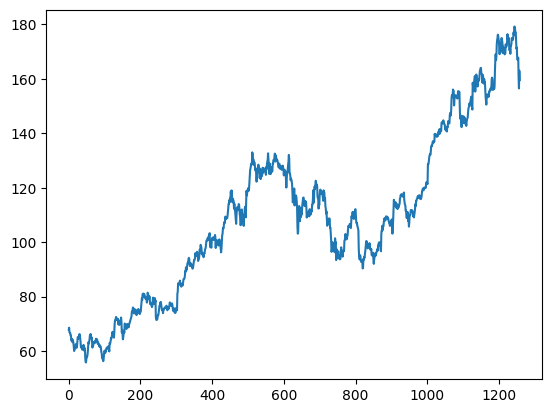

In [19]:
plt.plot(df2)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [21]:
df2

array([[0.0977103 ],
       [0.103438  ],
       [0.08951884],
       ...,
       [0.81558288],
       [0.86855117],
       [0.84028522]])

In [22]:
##splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:]

In [23]:
training_size,test_size

(818, 441)

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape,'\n',y_train.shape)

(717, 100) 
 (717,)


In [27]:
print(X_test.shape,'\n', ytest.shape)

(340, 100) 
 (340,)


In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [38]:
X_train.shape

(717, 100, 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 401ms/step - loss: 0.0227 - val_loss: 0.0643
Epoch 2/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0064 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 4s 382ms/step - loss: 0.0028 - val_loss: 0.0156
Epoch 4/100
12/12 [==============================] - 7s 604ms/step - loss: 0.0016 - val_loss: 0.0072
Epoch 5/100
12/12 [==============================] - 5s 435ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 6/100
12/12 [==============================] - 3s 261ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 7/100
12/12 [==============================] - 5s 397ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 8/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 9/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 10/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0011 - val_lo

In [63]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 41ms/step


In [56]:
### Calculating R2_Score
from sklearn.metrics import r2_score
r2_score(y_train,train_predict)*100

98.64601533110047

In [54]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.018888954363332912

In [55]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.02518762296303439

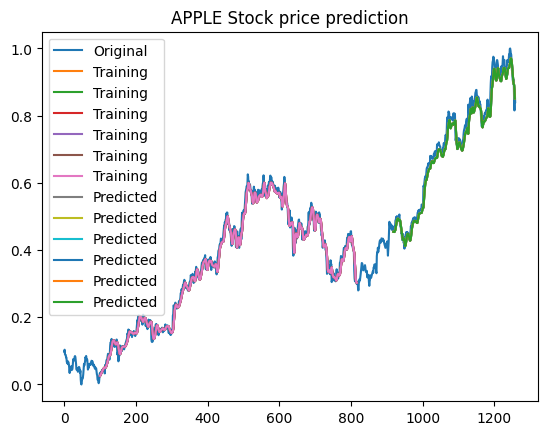

In [68]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df2, label = 'Original')
plt.plot(trainPredictPlot, label = 'Training')
plt.plot(testPredictPlot, label = 'Predicted')
plt.title('APPLE Stock price prediction')
plt.legend()
plt.show()